In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv("uber-raw-data-apr14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [9]:
df["Date"]=pd.to_datetime(df["Date/Time"])
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year


In [10]:

week= { 0 : "Sunday" ,
        1 : "Monday" ,
        2 : "Tuesday" ,
        3 : "Wedday" ,
        4 : "Thrusday" ,
        5 : "Friday" ,
        6 : "Satday" 
       }
df["Week"]=df["Date"].dt.dayofweek.map(week)

In [11]:
df.head()

,Date/Time,Lat,Lon,Base,Date,Day,Month,Year,Week
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,1,4,2014,Monday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,1,4,2014,Monday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,1,4,2014,Monday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,1,4,2014,Monday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,1,4,2014,Monday


In [12]:
df.rename(columns={"Date":"Dated"} ,inplace=True) 

In [18]:
df["Time"]=df["Dated"].dt.time

In [15]:
df["Date"]=df["Dated"].dt.date

In [19]:
df

,Date/Time,Lat,Lon,Base,Dated,Day,Month,Year,Week,Date,Time
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,1,4,2014,Monday,2014-04-01,00:11:00
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,1,4,2014,Monday,2014-04-01,00:17:00
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,1,4,2014,Monday,2014-04-01,00:21:00
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,1,4,2014,Monday,2014-04-01,00:28:00
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,1,4,2014,Monday,2014-04-01,00:33:00
...,...,...,...,...,...,...,...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764,2014-04-30 23:22:00,30,4,2014,Tuesday,2014-04-30,23:22:00
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764,2014-04-30 23:26:00,30,4,2014,Tuesday,2014-04-30,23:26:00
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764,2014-04-30 23:31:00,30,4,2014,Tuesday,2014-04-30,23:31:00
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764,2014-04-30 23:32:00,30,4,2014,Tuesday,2014-04-30,23:32:00


In [21]:
df.drop(columns=["Lat","Lon","Date/Time"] ,inplace=True )
#necssary to write param name index or columns can be used for both

In [22]:
df.head(3)

,Base,Dated,Day,Month,Year,Week,Date,Time
0,B02512,2014-04-01 00:11:00,1,4,2014,Monday,2014-04-01,00:11:00
1,B02512,2014-04-01 00:17:00,1,4,2014,Monday,2014-04-01,00:17:00
2,B02512,2014-04-01 00:21:00,1,4,2014,Monday,2014-04-01,00:21:00


In [38]:
df.groupby("Week")["Base"].count().sort_values(ascending=False)

Week
Tuesday     108631
Monday       91185
Thrusday     90303
Wedday       85067
Friday       77218
Sunday       60861
Satday       51251
Name: Base, dtype: int64

In [39]:
df.groupby("Base")["Month"].count().sort_values(ascending=False)

Base
B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Month, dtype: int64

In [23]:
df.pivot_table(index="Week" ,columns="Base" ,values="Month" ,aggfunc="count")

Base,B02512,B02598,B02617,B02682,B02764
Week,,,,,
Friday,4665,25966,13822,31330,1435
Monday,5871,29376,17913,36438,1587
Satday,3066,16900,9708,20673,904
Sunday,3945,19570,11537,24814,995
Thrusday,5552,28874,17295,37068,1514
Tuesday,6944,35837,21110,42821,1919
Wedday,5493,26740,16616,34664,1554


In [24]:
week=df.groupby("Week")["Base"].count().sort_values(ascending=False).reset_index()

In [25]:
week

,Week,Base
0,Tuesday,108631
1,Monday,91185
2,Thrusday,90303
3,Wedday,85067
4,Friday,77218
5,Sunday,60861
6,Satday,51251


In [26]:
week.rename(columns={"Base" :"Count"} ,inplace=True)

<BarContainer object of 7 artists>

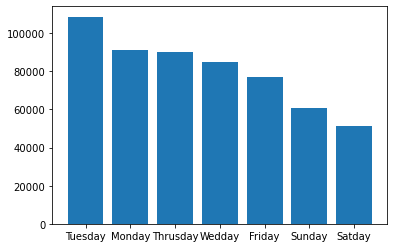

In [27]:
plt.bar(week["Week"] ,week["Count"])

<AxesSubplot:xlabel='Week', ylabel='count'>

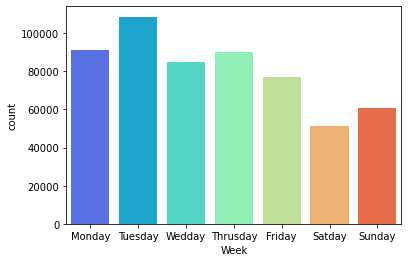

In [28]:
sns.countplot(x="Week" ,data=df ,palette="rainbow")

<AxesSubplot:xlabel='Week', ylabel='count'>

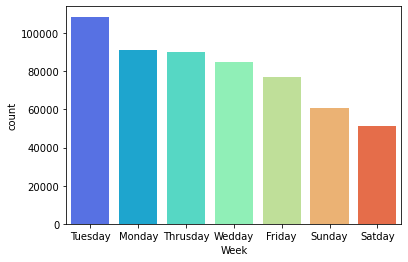

In [29]:
sns.countplot(x="Week" ,data=df ,palette="rainbow" ,order=df["Week"].value_counts().index)
#in ordr we use value_counts as it return series in descending ordex , thus extracting index

In [30]:
Base=df.groupby("Base")["Month"].count().sort_values(ascending=False)

In [50]:
Base

Base
B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Month, dtype: int64

<BarContainer object of 5 artists>

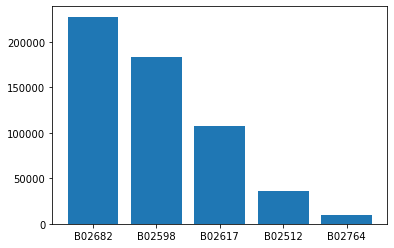

In [31]:
plt.bar(Base.index ,Base.values)

<AxesSubplot:xlabel='Base', ylabel='count'>

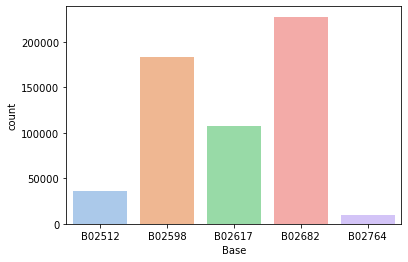

In [32]:
sns.countplot(x="Base" ,data=df ,palette="pastel")

In [33]:
week_base=df.pivot_table(index="Week" ,columns="Base" ,values="Month" ,aggfunc="count")

<AxesSubplot:xlabel='Base', ylabel='Week'>

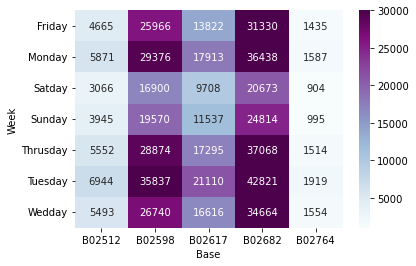

In [35]:
sns.heatmap(week_base , vmin=1000 ,vmax=30000 ,cmap="BuPu" ,annot=True ,fmt='d')

In [36]:
time_series=df.groupby("Date")["Base"].count().reset_index()

In [38]:
time_series.rename(columns={"Base" :"Count"} ,inplace=True)

In [39]:
time_series

,Date,Count
0,2014-04-01,14546
1,2014-04-02,17474
2,2014-04-03,20701
3,2014-04-04,26714
4,2014-04-05,19521
5,2014-04-06,13445
6,2014-04-07,19550
7,2014-04-08,16188
8,2014-04-09,16843
9,2014-04-10,20041


<AxesSubplot:xlabel='Date', ylabel='Count'>

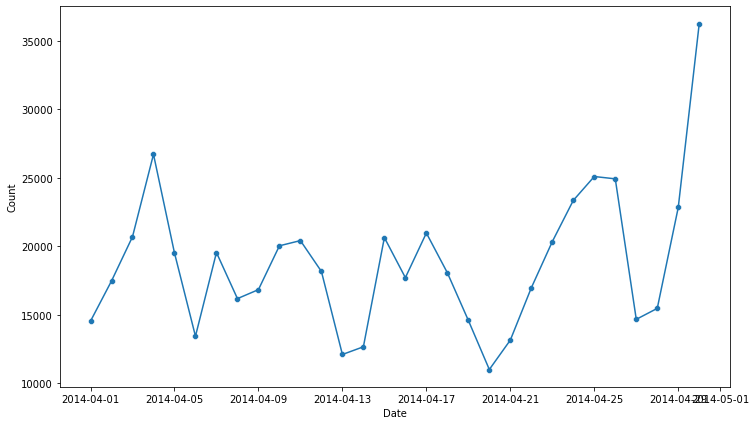

In [43]:
plt.figure(figsize=(12,7))
sns.lineplot(x="Date",y="Count",data=time_series)
sns.scatterplot(x="Date",y="Count",data=time_series)